In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'


In [2]:
import torch
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd')
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')
ssd_model.to('cuda')
ssd_model.eval()

Using cache found in /home/kuntai/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
Using cache found in /home/kuntai/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


SSD300(
  (feature_extractor): ResNet(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplac

In [72]:
uris = [
    'http://images.cocodataset.org/val2017/000000397133.jpg',
]

from PIL import Image
inputs = [utils.prepare_input(uri) for uri in ['/tank/kuntai/code/video-compression/visdrone/videos/vis_171/0000000000.png']]
tensors = utils.prepare_tensor(inputs)

# print(tensors.shape)

# x = Image.open('/tank/kuntai/code/video-compression/visdrone/videos/vis_171/0000000000.png')
# transform = T.Compose([T.Resize((300,533)), T.CenterCrop((300,300)),  T.ToTensor()])
# x = transform(x)
# x = (x * 256 - 128) / 128
# x = x.unsqueeze(0).cuda()

In [73]:

with torch.no_grad():
    detections_batch = ssd_model(tensors)

results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.0) for results in results_per_input]
classes_to_labels = utils.get_coco_object_dictionary()

8
3
3
3
3
3
26
3
3
26
3
3
3
3
26
26
3
3
3
3


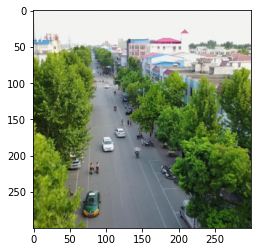

In [70]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw


image = Image.open('/tank/kuntai/code/video-compression/visdrone/videos/vis_171/0000000000.png')

for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)
    # Show original, denormalized image...
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        print(classes[idx])
        # x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        # rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        # ax.add_patch(rect)
        # ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()

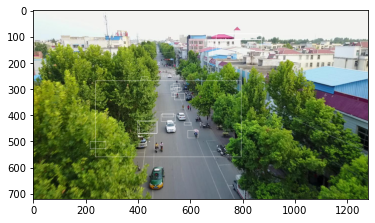

In [76]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw


image = Image.open('/tank/kuntai/code/video-compression/visdrone/videos/vis_171/0000000000.png')
draw = ImageDraw.Draw(image)

for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)
    # Show original, denormalized image...
    #image = inputs[image_idx] / 2 + 0.5
    #ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        left, bot, right, top = left*1280, bot*729, right*1280, top*720
        # top, left, bottom, right
        draw.rectangle((left, bot, right, top))
        # x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        # rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        # ax.add_patch(rect)
        # ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
ax.imshow(image)